__Infomation of student__

+ __Fullname__: Huỳnh Tuấn Nam

+ __ID__      : 20120136

### __Table of Contents__

**[1. About Networkx](#section-1)**

**[2. Graph Generator](#section-2)**

**[3. References](#section-3)**

### <a id = "section-1"></a>__1. About Networkx__<br>


#### <a id = "section-1"></a>__1.1. Software for Complex Networks__<br>
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides:

+ tools for the study of the structure and dynamics of social, biological, and infrastructure networks;

+ a standard programming interface and graph implementation that is suitable for many applications;

+ a rapid development environment for collaborative, multidisciplinary projects;

+ an interface to existing numerical algorithms and code written in C, C++, and FORTRAN; and

+ the ability to painlessly work with large nonstandard data sets.

#### __1.2. How to use__

+ __Creating a graph__

In [1]:
import networkx as nx
G = nx.Graph()

In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

The above syntax creates an empty __Graph__ ,i.e., a graph with no nodes and no edages.

+ __Visualization__

In order to visualize the created graph, we need to use the __matplotlib.pyplot__ package

In [2]:
import matplotlib.pyplot as plt

# Create the function to visualize the graph
def draw_graph(G, node_size = 300,  figsize = (13.69, 8.27)):
    fig, ax = plt.subplots(1,1, figsize = figsize)
    plt.axis("off")
    fig.patch.set_facecolor('#fff')
    nx.draw_networkx(G, node_size = node_size, with_labels = True, ax = ax)
    plt.show()

+ __Nodes__

__add_node__: Add one node to the graph.

In [3]:
# Add one node
G.add_node(1)
G.add_node(2)

G.add_node(1) ## The duplicate nodes are removed.


print("Nodes in Graph: " + str(G.nodes))

Nodes in Graph: [1, 2]


__add_node_from__: add nodes from any iterable container.

In [4]:
G.add_nodes_from([3,4])
## or 
G.add_nodes_from("HTN")
print(G.nodes)
print(len(G.nodes))

[1, 2, 3, 4, 'H', 'T', 'N']
7


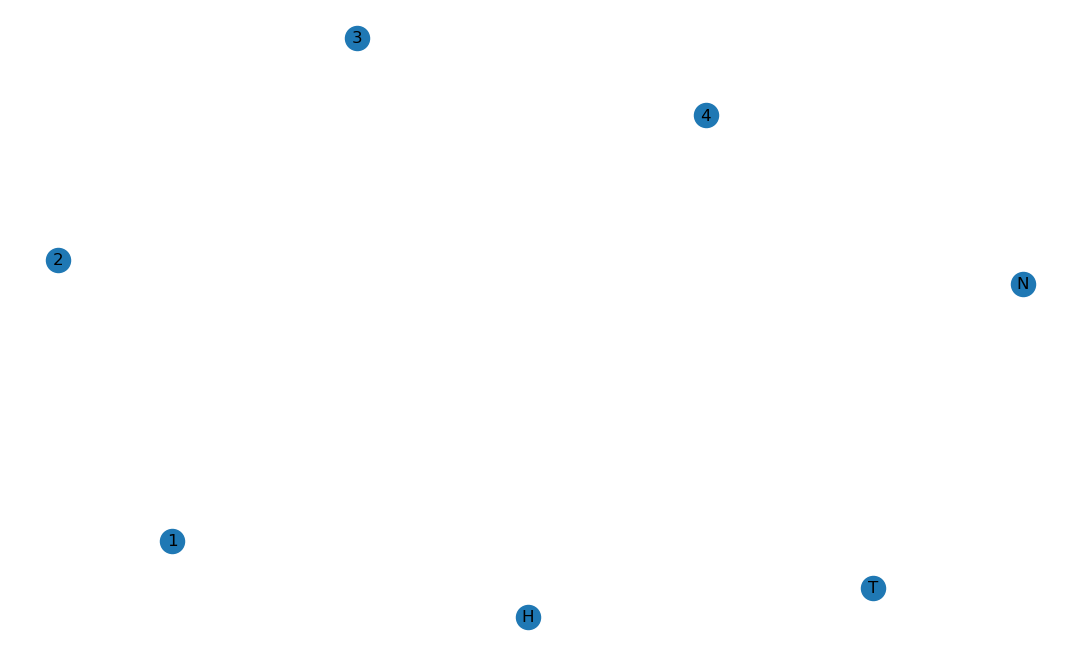

In [5]:
draw_graph(G)

+ __Edges__

The graph is having __7 above vertices__ and __no edges__, so we need use the following functions to create edges.

__add_edge__: add edge between pairs of nodes. If the node is not existed, graph will add that node into.

__add_edges_from__: add a list of edges

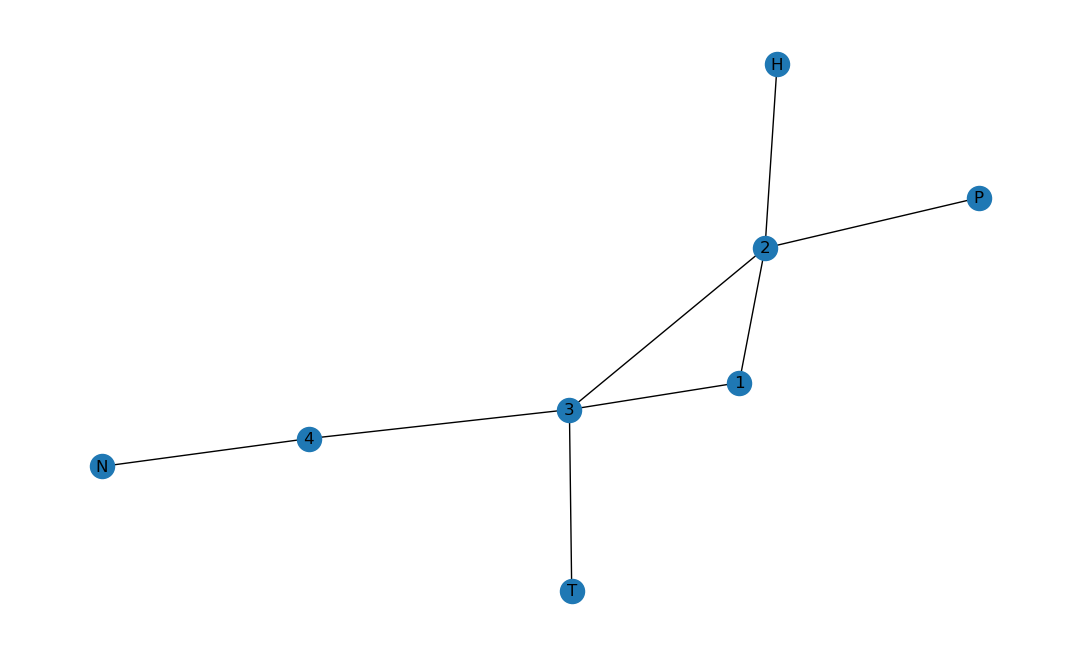

In [6]:
G.add_edge(2,3)
G.add_edge(2, "H")
G.add_edge(3, "T")
G.add_edge(1, 2)
G.add_edges_from([(4,"N"), (4, 3), (3, 1)])

G.add_edge(2, "P") # add the new edge but the node is not existed in graph
draw_graph(G)

Besides, networkx provides functions for
+ __removing node__ 
+ __adding features to nodes or edges__
  + name of node, edge
  + the weighted edges   

+ __the algorithm on graph__
  + Find the shortest path
  + Find the average clustering
  + Find the diameter
  + Find the subgraphs

+ __load graph from file__

__Networkx__ can create different types of graph.
+ Graph: undirected graph (it has loop vertices).
+ DiGraph: directed graph (it has loop vertices).
+ MultiGraph or MultiDiGraph.

Networkx supports converting __undirected__ to __directed__ graph and vice versa.

### <a id = "section-2"></a> __2. Graph  Generator__

In [7]:
## Define the nescessary variable
nodes = 5
figsize = (13.69, 8.27)
max_nodes = 1000

__2.1 Complete Graph__

A complete graph is a simple undirected graph in which every pair of distinct vertices is connected by a unique edge. All vertices in a cycle graph have degree $n-1$ (with $n$ is the number of nodes)

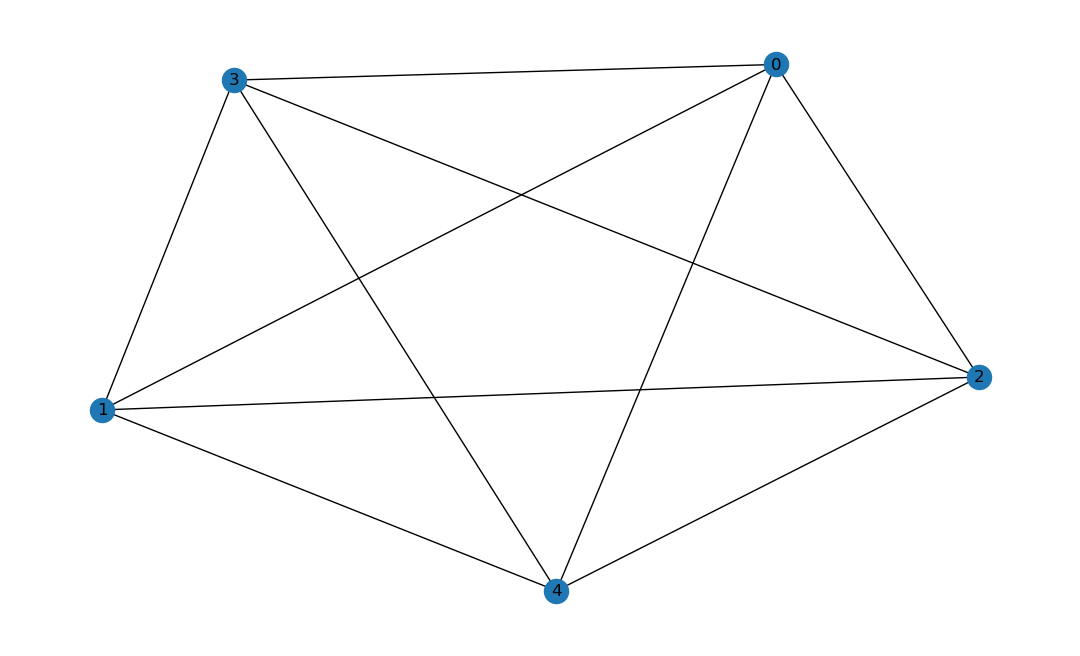

In [8]:
cpG = nx.complete_graph(nodes)
draw_graph(cpG, figsize = figsize)

__2.2 Cycle Graph__

A cycle graph is a simple graph consisting of $n$ vertices and $n$ edges arranged in a cycle. All vertices in a cycle graph have degree $2$

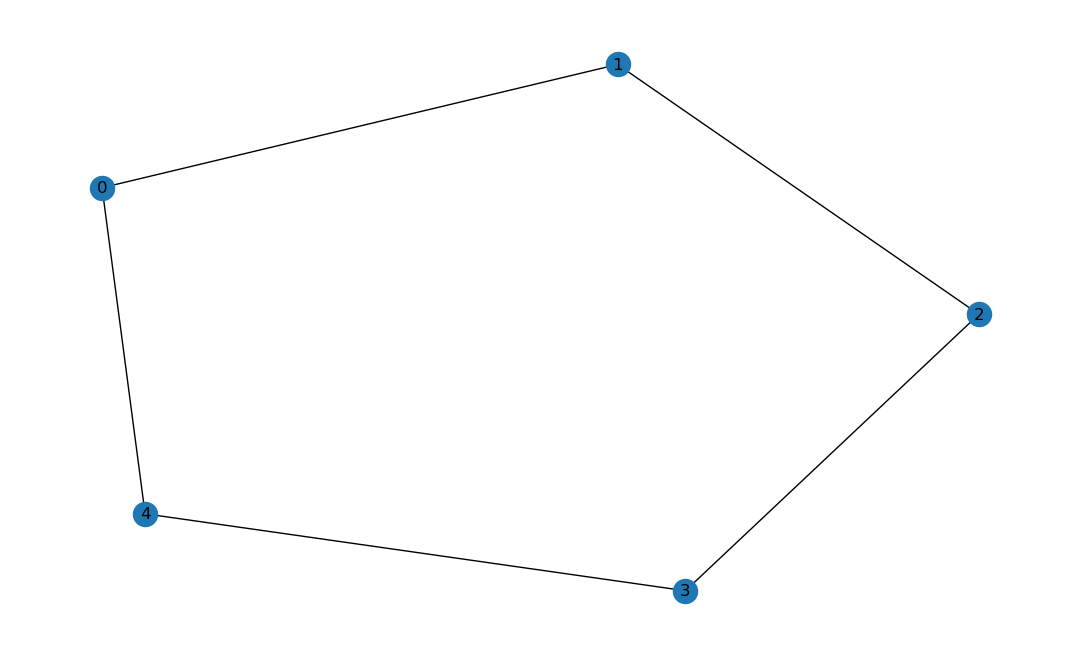

In [9]:
ccG = nx.cycle_graph(nodes)
draw_graph(ccG, figsize = figsize)

__2.3. Erdős-Rényi Graph__

An Erdős-Rényi graph is a random graph that is generated by selecting a set of edges randomly from all possible edges with a certain probability `p`.

> Parameter

__n: int__<br>
&emsp;The number of nodes.

__p: float__<br>
&emsp;Probability for edge creation.

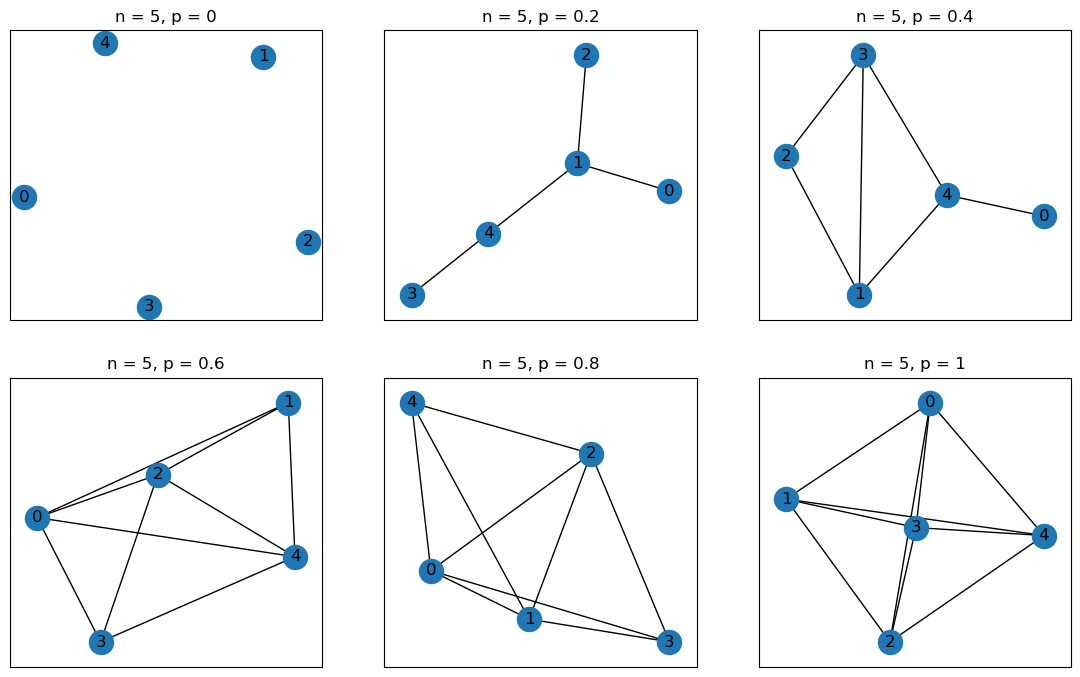

In [10]:
probs = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig, axes = plt.subplots(2, 3, figsize = figsize)
for i, p in enumerate(probs):
    row = int(i/3)
    col = i%3
    nx.draw_networkx(nx.erdos_renyi_graph(nodes, p), ax = axes[row, col])
    axes[row, col].set_title(f"n = {nodes}, p = {p}")
plt.show()

Case __p = 0__: The graph has __n__ nodes and no edges.

Case __0 < p < 1__: The probability that generating the edge between any pair of node is `p`.

Case __p = 1__: Becoming the complete graph.

__2.4. Watts Strogatz Graph__

+ Watt Strogatz is a small-world graph.

+ First create a ring over n nodes. Then each node in the ring is joined to its $k$ (or $ k - 1 $ if  $ k $ is odd). Then shortcuts are created by replacing some edges as follows: for each edge ($u, v$) in the underlying "$n$-ring with $k$ nearest neighbors" with probability $p$ replace it with a new edge (u, w) with uniformly random choice of existing node $w$

> Parameters

__n: int__<br>
&emsp; The number of nodes

__k: int__<br>
&emsp; Each node is joined with its __k__ nearest neighbors in a ring topology

__p: float__<br>
&emsp; The probability of rewiring each edge.

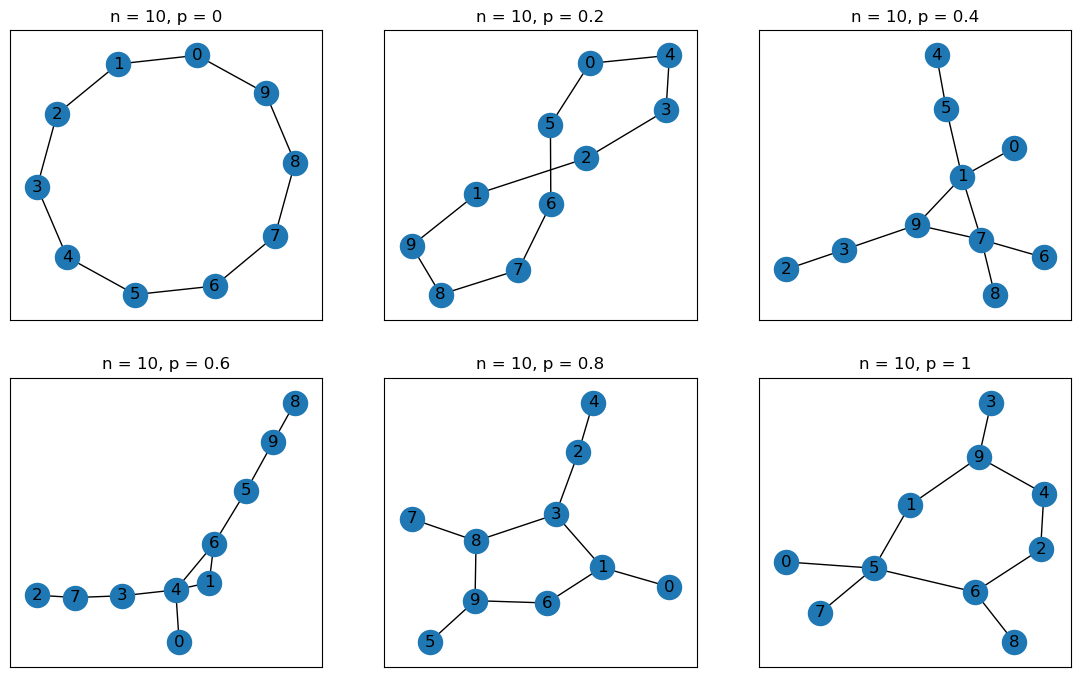

In [11]:
# wsG = nx.watts_strogatz_graph(10, 2, .5)
# draw_graph(wsG)

n = 10
probs = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig, axes = plt.subplots(2, 3, figsize = figsize)
for i, p in enumerate(probs):
    row = int(i/3)
    col = i%3
    nx.draw_networkx(nx.watts_strogatz_graph(n, 2, p), ax = axes[row, col])
    axes[row, col].set_title(f"n = {n}, p = {p}")
plt.show()

__2.5 Barabasi Albert Graph__

+ A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.

+ Preferential attachment means that the more connected a node is, the more likely it is to receive new links. Nodes with higher degree have stronger ability to grab links added to the network.

> Parameters

__n: int__<br>
&emsp; The number of nodes

__m: int__<br>
&emsp; Number of edges to attach from a new node to existing nodes

__initial_graph: Graph or None__<br>
&emsp; Initial network for Barabási–Albert algorithm. It should be a connected graph for most use cases. A copy of __`initial_graph`__ is used. If None, starts from a star graph on $(m+1)$ nodes.

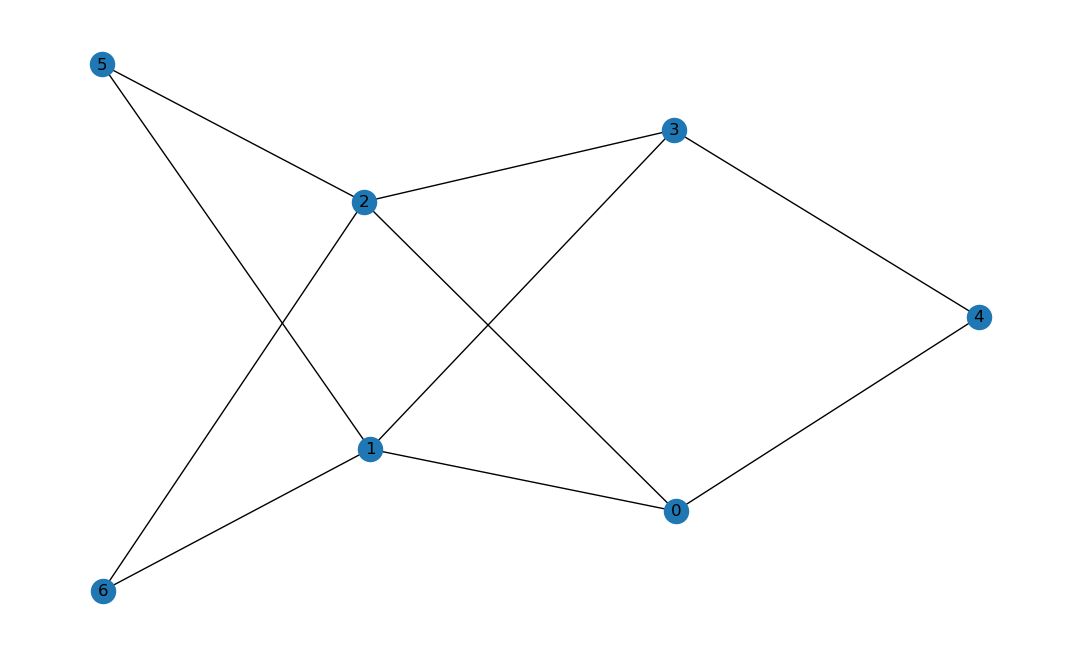

In [12]:
import networkx as nx

baG = nx.barabasi_albert_graph(7, 2)
draw_graph(baG)

__2.6. Powerlaw Cluster Graph__

This graph is created using the Holme and Kim algorithm to create new vertices and connect them to existing vertices in the graph according to a certain rule.

`powerlaw_cluster_graph` generates a power-law cluster graph (PC). It is essentially the Barabási–Albert (BA) growth model with an extra step that each random edge is followed by a chance of making an edge to one of its neighbors too (and thus a triangle).

By my observation, the difference between BA graph and PC graph is:

+ The BA graph, the started node is vertex $0$, and $m$ node(s) (vertex: $1$ to $m$) is attached to $0$.
+ The PC graph, the started node is vertex $m$, and $m$ node(s) (vertex: $m-1$ to 0) is attached to $m$ 
 
> Parameters

__n: int__<br>
&emsp; The number of nodes

__m: int__<br>
&emsp; The number of random edges to add for each new node

__p: float__<br>
&emsp; Probability of adding a triangle after adding a random edge


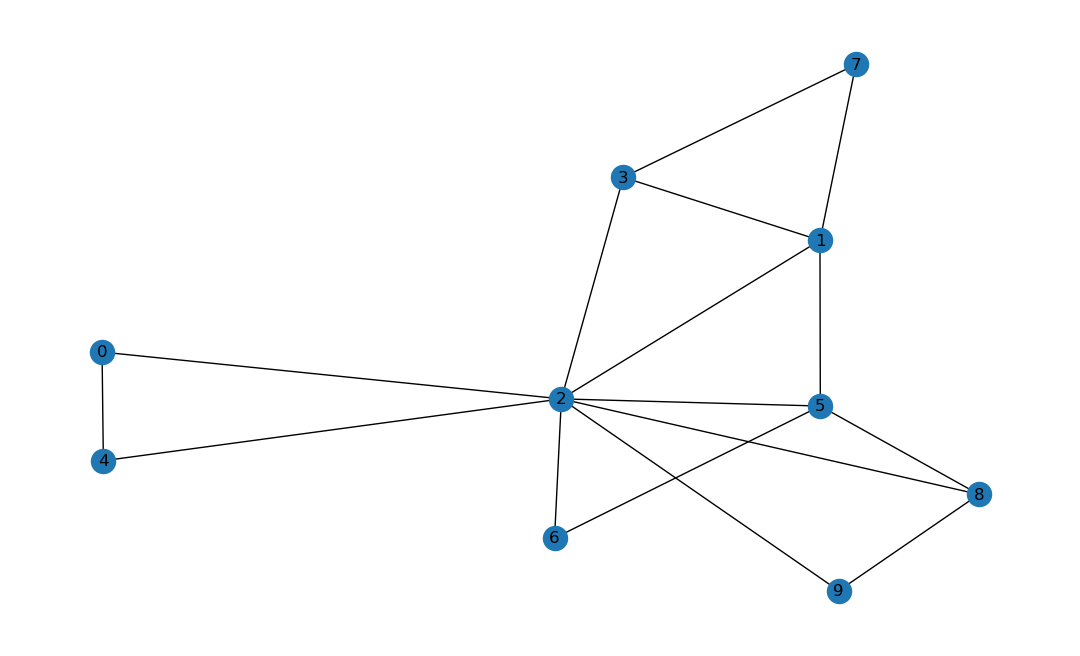

In [13]:
pcG = nx.powerlaw_cluster_graph(10, 2, 0.5)
draw_graph(pcG)

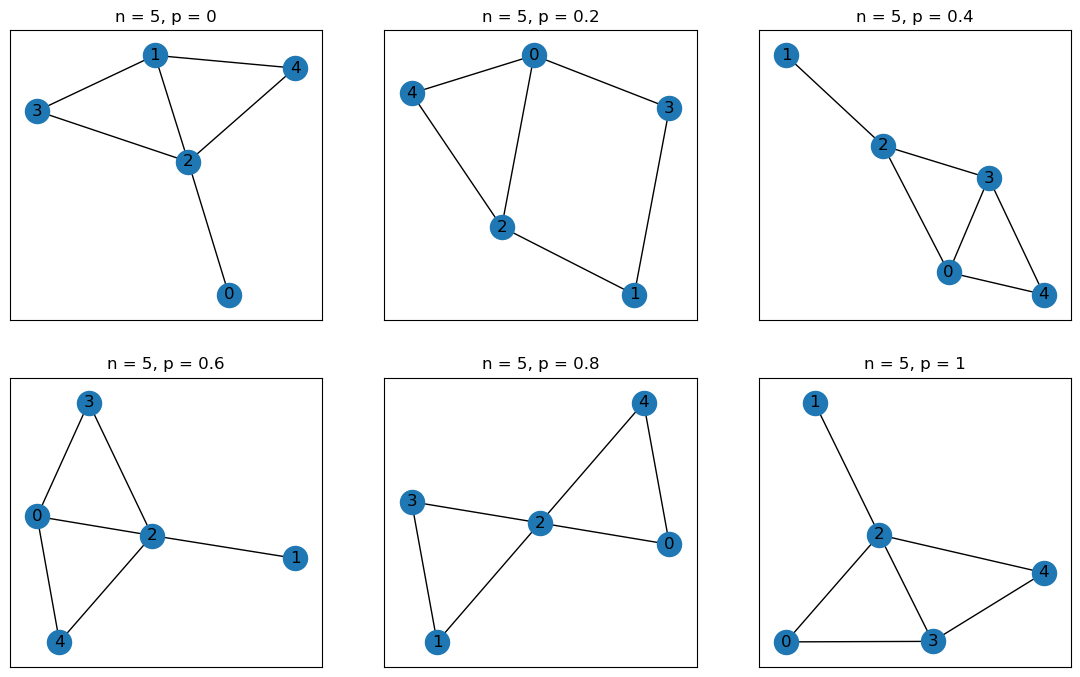

In [14]:
probs = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig, axes = plt.subplots(2, 3, figsize = figsize)
for i, p in enumerate(probs):
    row = int(i/3)
    col = i%3
    nx.draw_networkx(nx.powerlaw_cluster_graph(5, 2, p), ax = axes[row, col])
    axes[row, col].set_title(f"n = {nodes}, p = {p}")
plt.show()

__2.7. Random K Out Graph__

A “random k-out graph” with preferential attachment is a multidigraph generated by the following algorithm:

1. Begin with an empty digraph, and initially set each node to have weight $alpha$.
2. Choose a node $u$ with out-degree less than $k$ uniformly at random.
3. Choose a node $v$ from with probability proportional to its weight.
4. Add a directed edge from $u$ to $v$, and increase the weight of $v$ by one.
5. If each node has out-degree $k$, halt, otherwise repeat from step 2.

> Parameters

__n: int__<br>
&emsp; The number of nodes

__k: int__<br>
&emsp; The out-degree of each node in the returned graph.

__alpha: float__<br>
&emsp; A positive float representing the initial weight of each vertex. A higher number means that in step 3 above, nodes will be chosen more like a true uniformly random sample, and a lower number means that nodes are more likely to be chosen as their in-degree increases.

__self_loops: float__<br>
&emsp; If True, self-loops are allowed when generating the graph.

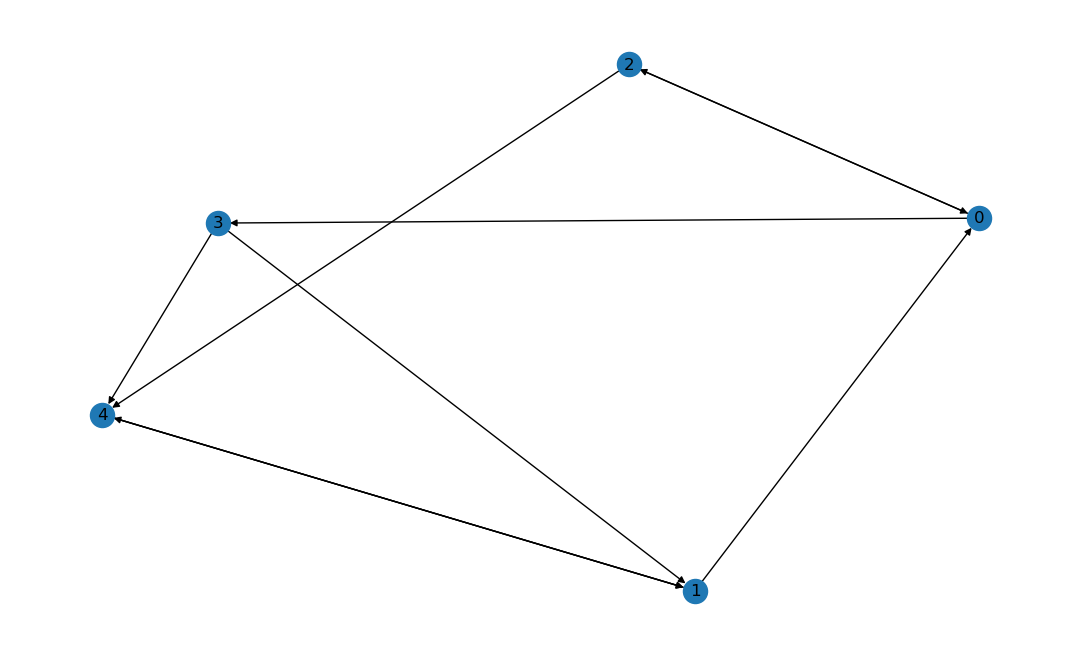

In [15]:
rkoG = nx.random_k_out_graph(
    n = 5,
    k = 2,
    alpha =3.,
    self_loops = False
)

draw_graph(rkoG)

__2.8. Geographical Threshold Graph__

> Parameters

__n: int__<br>
&emsp; The number of nodes

__theta: float__<br>
&emsp; Threshold value

__dim: int__<br>
&emsp; Dimension of graph

__pos: dict__<br>
&emsp; Node positions as a dictionary of tuples keyed by node.

__weight: dict__<br>
&emsp; Node weights as a dictionary of numbers keyed by node.

__metric: function__<br>
&emsp; A metric on vectors of numbers (represented as lists or tuples). This must be a function that accepts two lists (or tuples) as input and yields a number as output. A metric on vectors of numbers (represented as lists or tuples). This must be a function that accepts two lists (or tuples) as input and yields a number as output.
1. Positivity: $d(x,y) >= 0$ $\forall x, y$
2. Identity: $d(x, y) = 0$ if and only if $x = y$
3. Symmetry: $d(x,y) = d(y,x)$ $\forall x,y$
4. Triangle inequality $d(x, z) \leq d(x,y) + d(y,z)$ $\forall x,y,z$

If this argument is not specified, the Euclidean distance metric is used.

__p_dict: function__<br>
&emsp; Any function used to give weight to the distance between nodes when deciding whether or not they should be connected.  If p_dist = None (the default), the exponential function $r^{-2}$ is used.



This function is used to generate a random graph with vertices uniformly distributed in a rectangular domain. Each vertex will have a randomly assigned weight. Two vertices $u$ and $v$ will be connected if 
$$(w_u + w_v) * p_{dist}(r) >= \theta$$
, where r is the distance between $u$ and $v$, $p_{dist}$ is a function of $r$, and theta is the connection threshold. The `geographical_threshold_graph` function returns an undirected random graph with no self-loops, each vertex has an attribute `pos` that stores the position of that vertex in Euclidean space as provided by the pos keyword argument or, if pos was not provided, as generated by this function. Similarly, each vertex has an attribute weight that stores the weight of that vertex as provided or as generated.

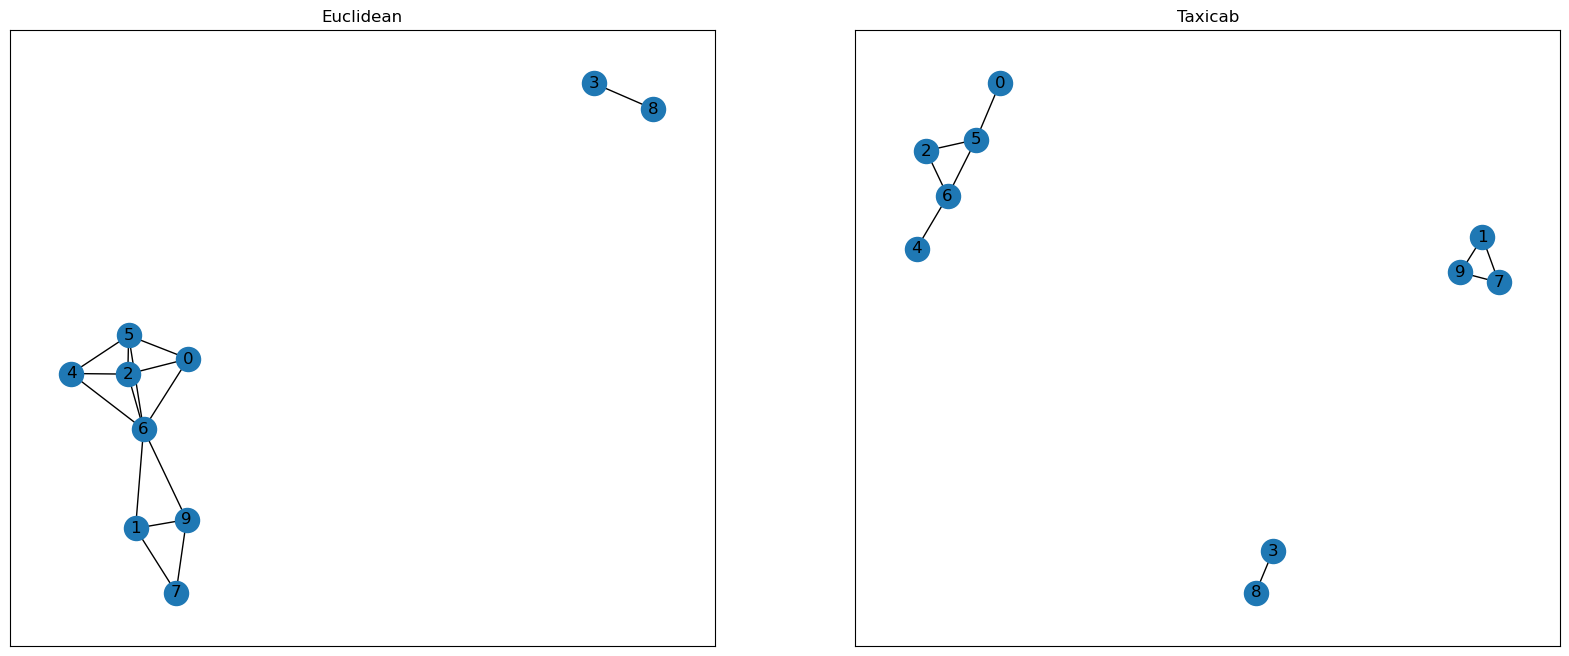

In [16]:
import random
import math
import numpy as np

taxicab = lambda x, y: sum(abs(a - b) for a, b in zip(x, y)) ## len of x or y depends on the dimension of graph in.
euclidean = lambda x, y: math.sqrt(sum((x_i - y_i) ** 2 for x_i, y_i in zip(x, y)))
n = 10
w = {i: np.random.exponential(scale = 1) for i in range(n)}
pos = {i: [random.uniform(0,1) for j in range(2)] for i in range(n)}
threshold = 7

ecGTG = nx.geographical_threshold_graph(n, theta = threshold, weight = w, metric = euclidean, pos = pos)
tcGTG = nx.geographical_threshold_graph(n, theta = threshold, weight = w, metric = taxicab, pos = pos)

fig, axes = plt.subplots(1,2 , figsize = (20,8))
nx.draw_networkx(ecGTG, ax = axes[0])
nx.draw_networkx(tcGTG, ax = axes[1])
axes[0].set_title('Euclidean')
axes[1].set_title('Taxicab')

plt.show()

__2.9. Graph has largest size in local.__

In [17]:
nodes = 2000
p = 0.5

cpG = nx.complete_graph(nodes)
ccG = nx.cycle_graph(nodes)
erG = nx.erdos_renyi_graph(nodes, p)
wsG = nx.watts_strogatz_graph(nodes, 200, p)
baG = nx.barabasi_albert_graph(nodes, 200)
pcG = nx.powerlaw_cluster_graph(nodes, 200, p)
rkoG = nx.random_k_out_graph(nodes, k = 20, alpha =20., self_loops = False)
gtG = nx.geographical_threshold_graph(nodes, theta = 10)

In [18]:
list_graphs = [cpG, ccG, erG, wsG, baG, pcG, rkoG, gtG]

In [19]:
list_size_graphs = [graph.size() for graph in list_graphs]
print(list_size_graphs)

[1999000, 2000, 998716, 200000, 360000, 349910, 40000, 744797]


In [20]:
max(list_size_graphs)

1999000

### __3. Visualization__

__3.1. Radial__

&emsp; Radial layouts position nodes in a circle.

+ Creating 2 Erdos Renyi Graph with smaller size (with 10 nodes) and larger size (with 100 nodes).

In [21]:
G = nx.erdos_renyi_graph(100, 0.5)
G10 = nx.erdos_renyi_graph(10, 0.5)
vccG = nx.cycle_graph(100)
rkoG = nx.random_k_out_graph(5, 4, 2, False)

+ Using `nv.circos` in nxviz package to visualize the graph by __radial__

c:\Users\Nam\miniconda3\envs\myenv\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


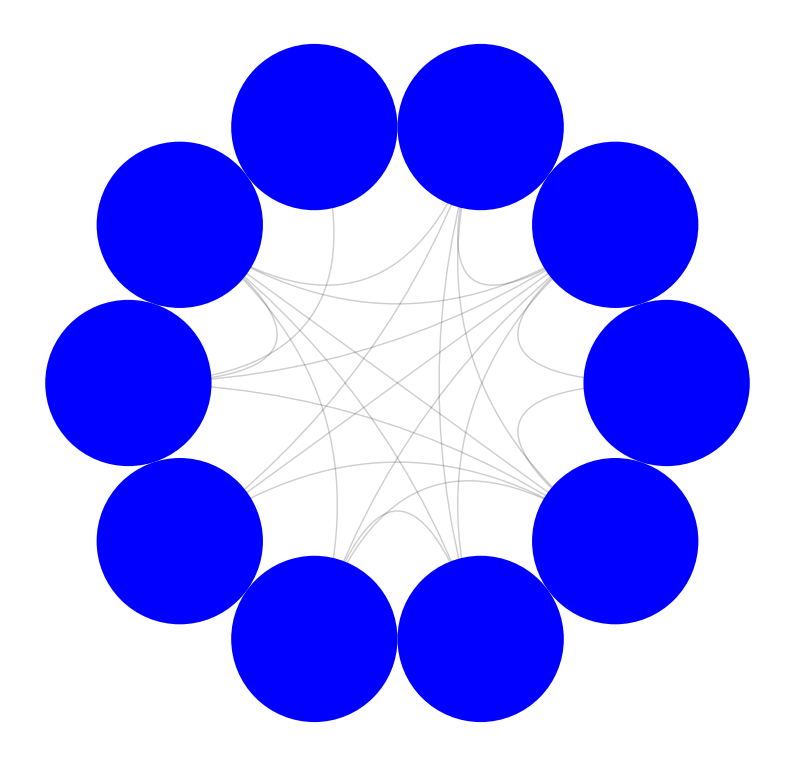

In [22]:
plt.figure(figsize=(10,10))
import nxviz as nv
ax = nv.circos(G10)

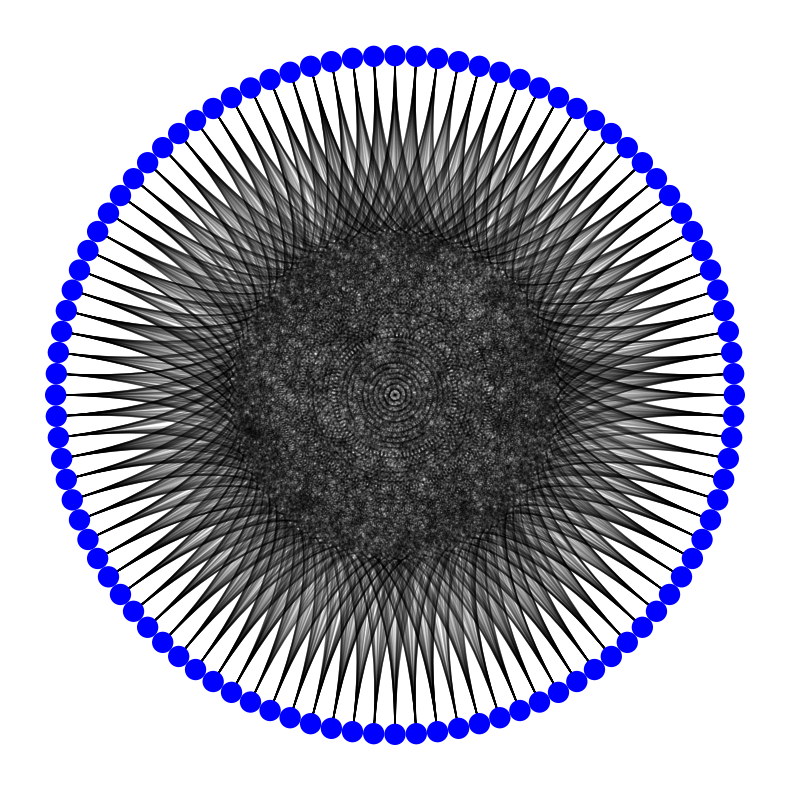

In [23]:
plt.figure(figsize=(10,10))
import nxviz as nv
ax = nv.circos(G)

+ Using `circular_layout` of `networkx`

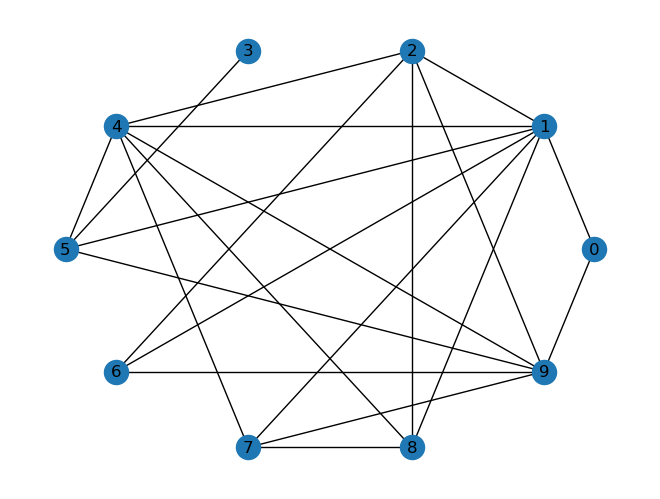

In [24]:
nx.draw_circular(G10, with_labels=True)

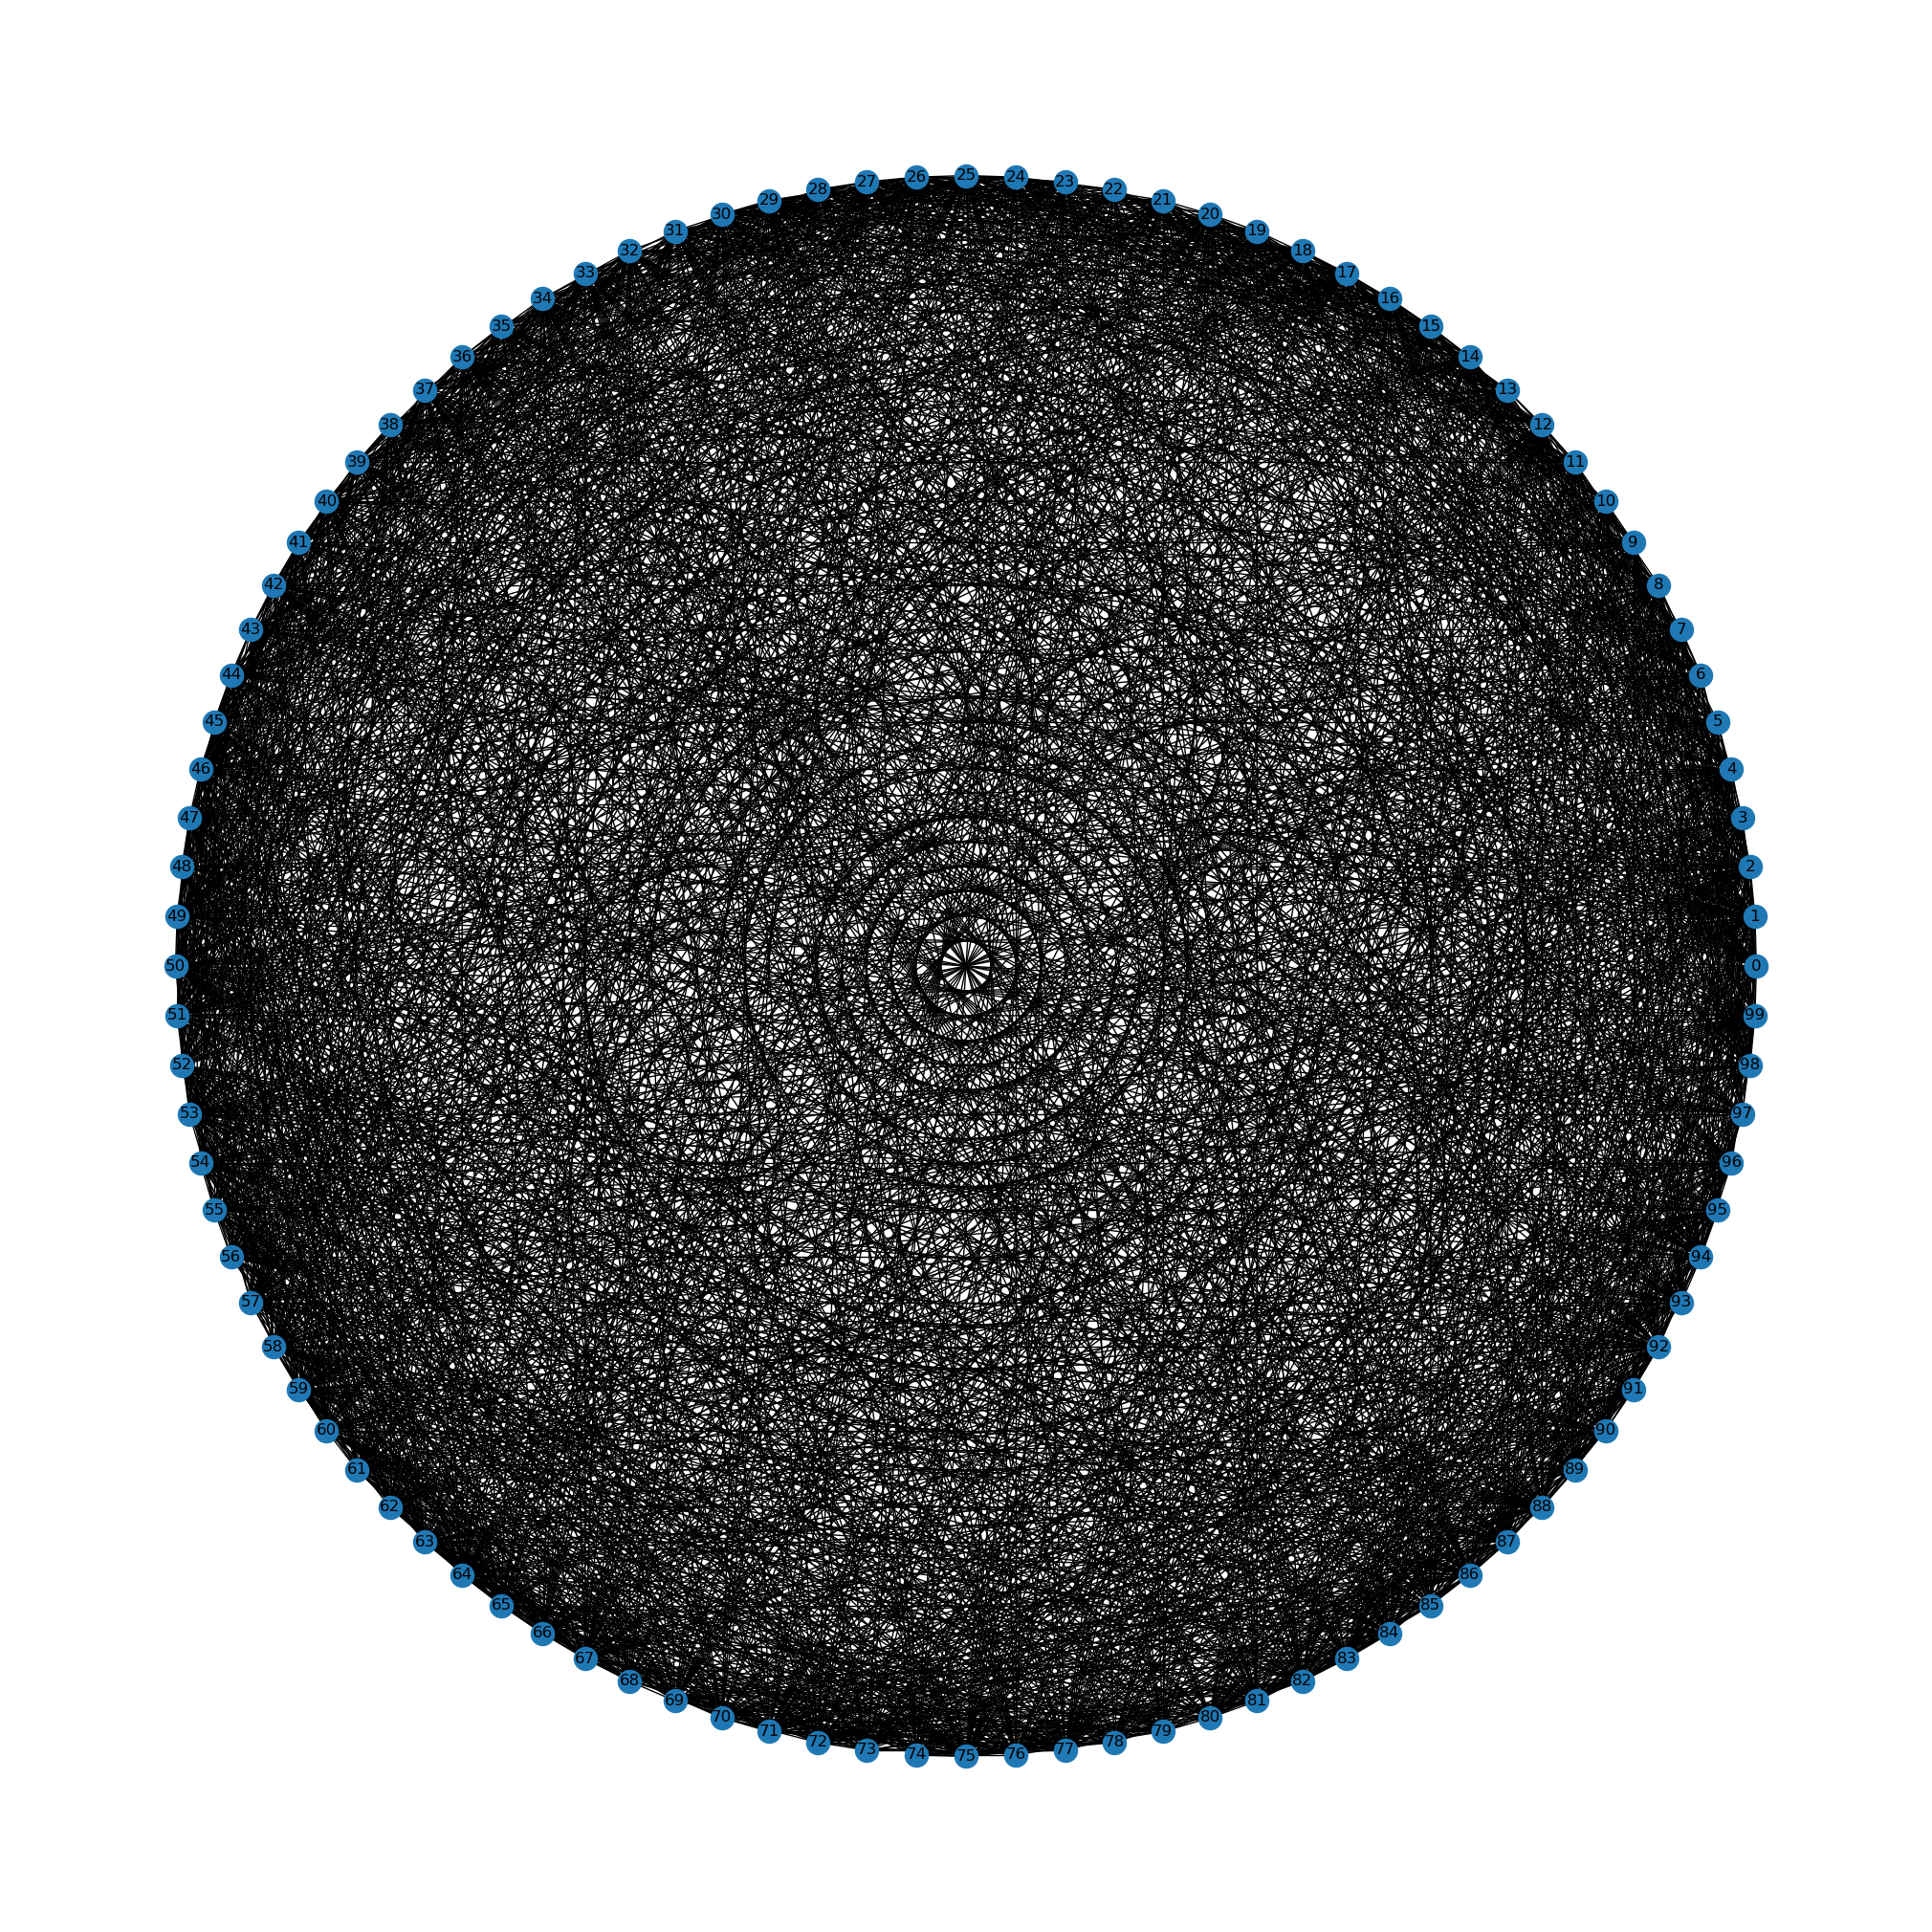

In [25]:
# Vẽ đồ thị bằng phương pháp Radial
plt.figure(figsize=(20,20))
nx.draw_circular(G, with_labels=True)
plt.show()

__Notes__: A radial layout can work well for smaller graphs, but use caution for large graphs. When there are hundreds or thousands of nodes there can be a lot of wasted space and it can be difficult to fit the entire visualization on the screen.

__3.2. Arc__

+ Arc diagrams show the graph’s nodes in a linear order.

Using `nv.arc` in `nxviz` to visualize the graph by arc diagram

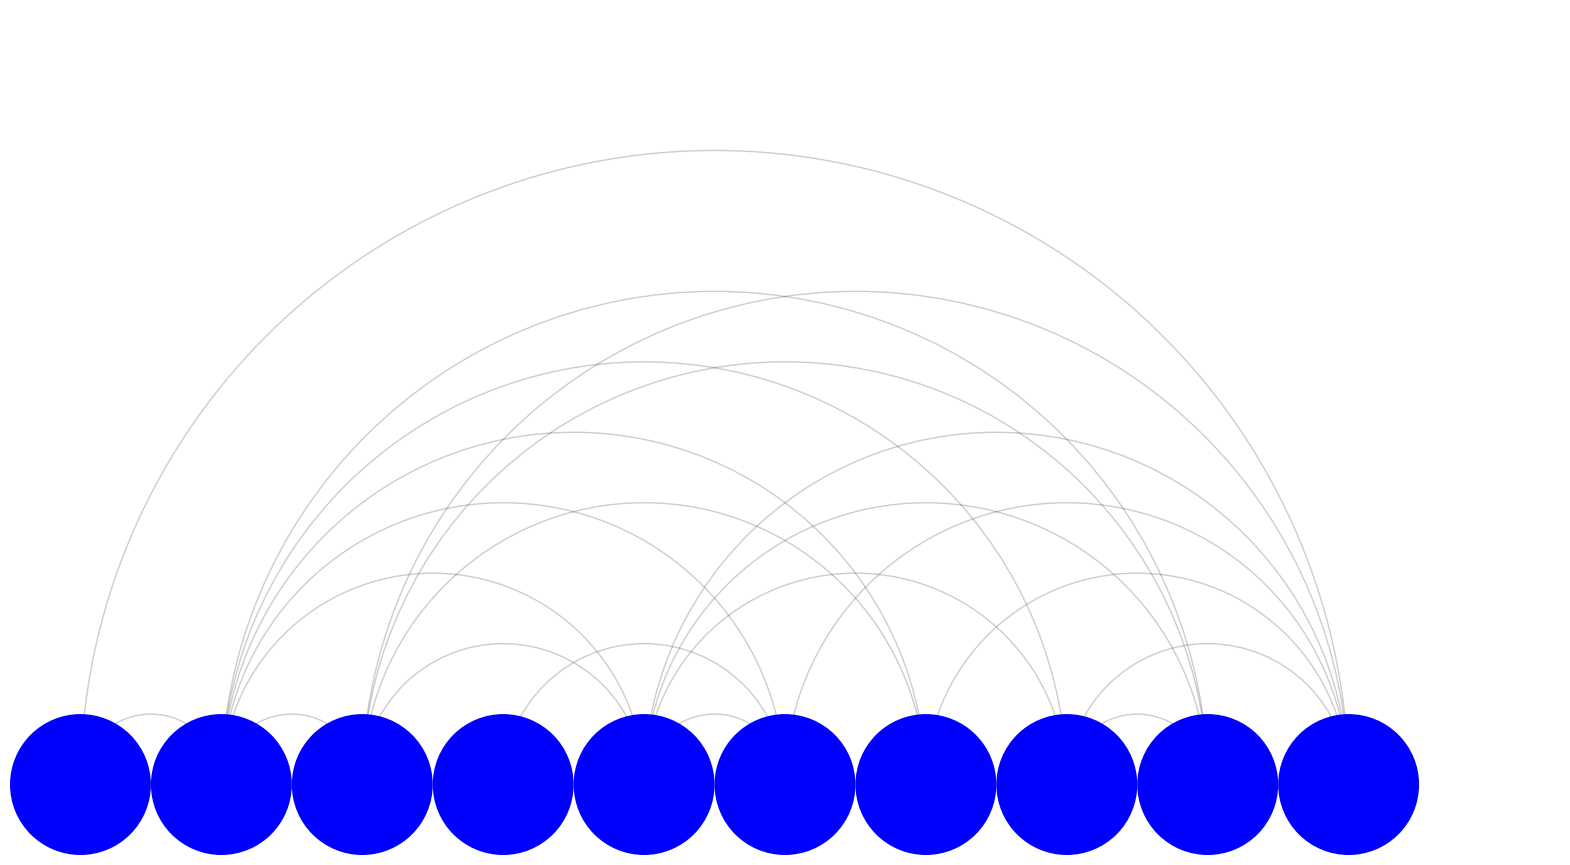

In [26]:
plt.figure(figsize=(20,20))
bx = nv.arc(G10)
plt.show()

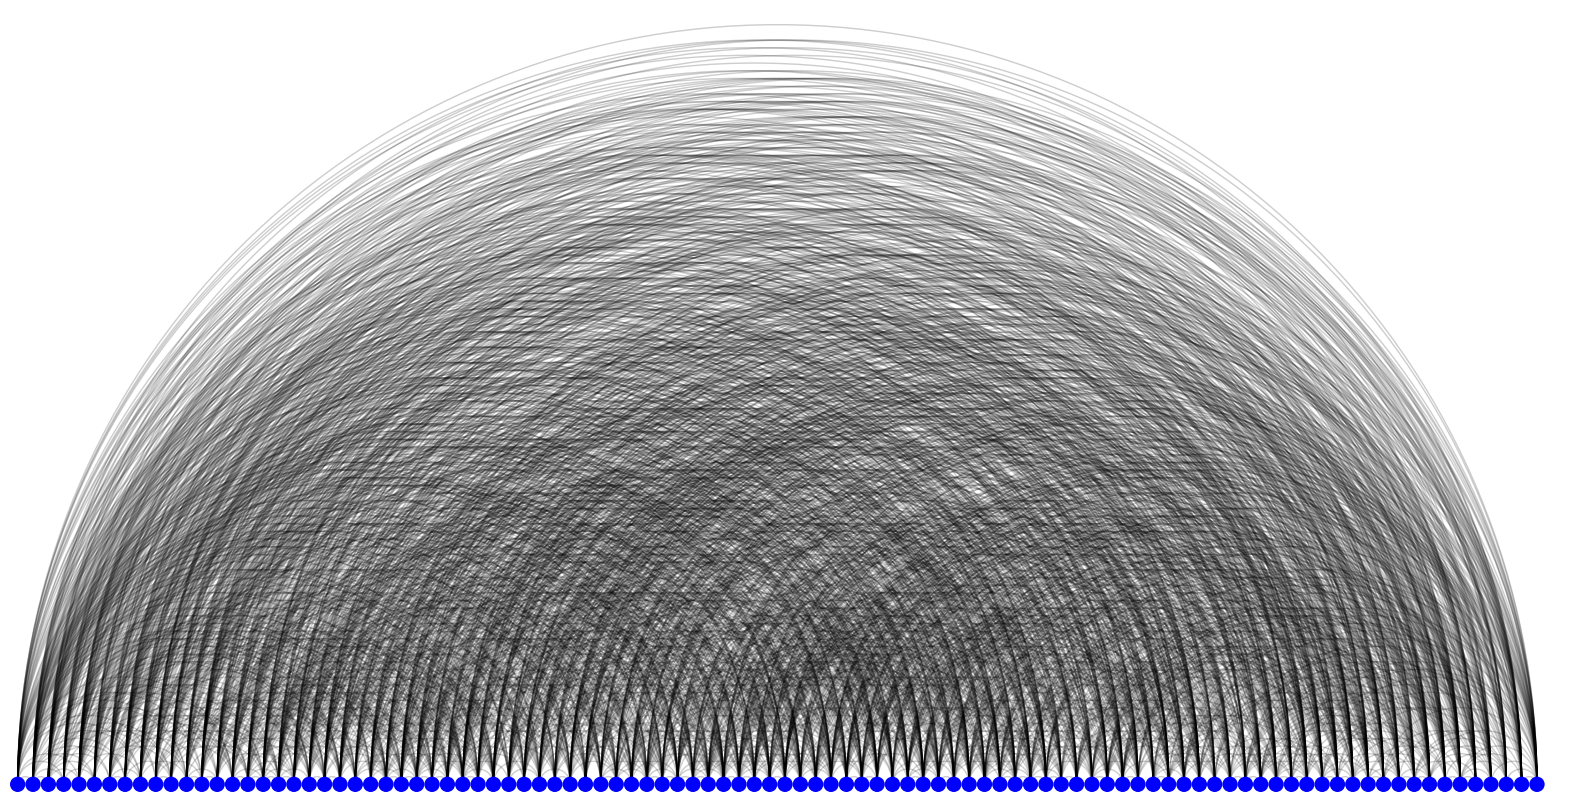

In [27]:
plt.figure(figsize=(20,20))
bx = nv.arc(G)
plt.show()

__Note__: The size of the visualization can quickly become too large if there are more than a few hundred nodes. It can also be difficult to identify clusters of tightly connected nodes because the layout emphasizes order and not clusters.

__3.3. Matrix Diagram__

Matrix diagrams show the graph as a grid. Each node has a row and a column, and cells are filled in if there is a link connecting two nodes. (Adjacency matrix)

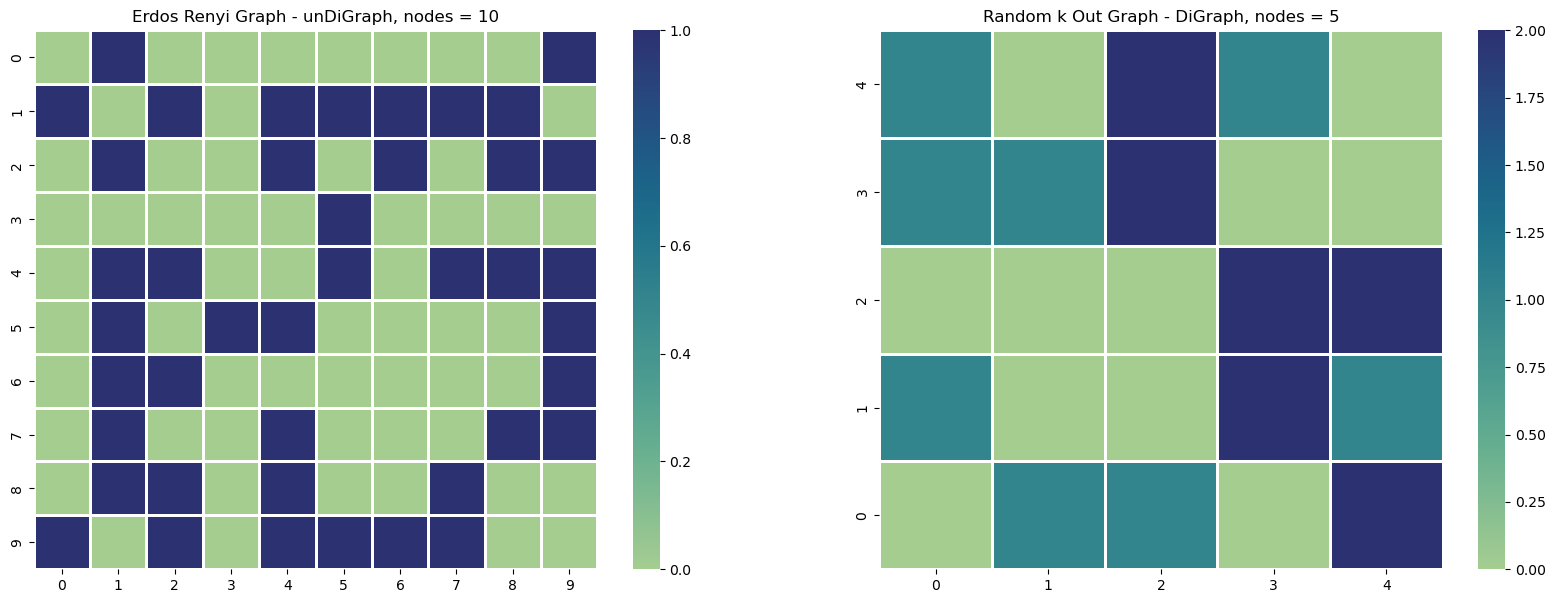

In [28]:
adj_matrix = nx.adjacency_matrix(G10).toarray()
rko_adj_matrix = nx.adjacency_matrix(rkoG).toarray()

import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.heatmap(adj_matrix, linewidths= 1, cmap = 'crest', ax =ax[0])
sns.heatmap(rko_adj_matrix, linewidths= 1, cmap = 'crest', ax = ax[1])
plt.gca().invert_yaxis()

ax[0].set_title("Erdos Renyi Graph - unDiGraph, nodes = 10")
ax[1].set_title("Random k Out Graph - DiGraph, nodes = 5")

plt.show()

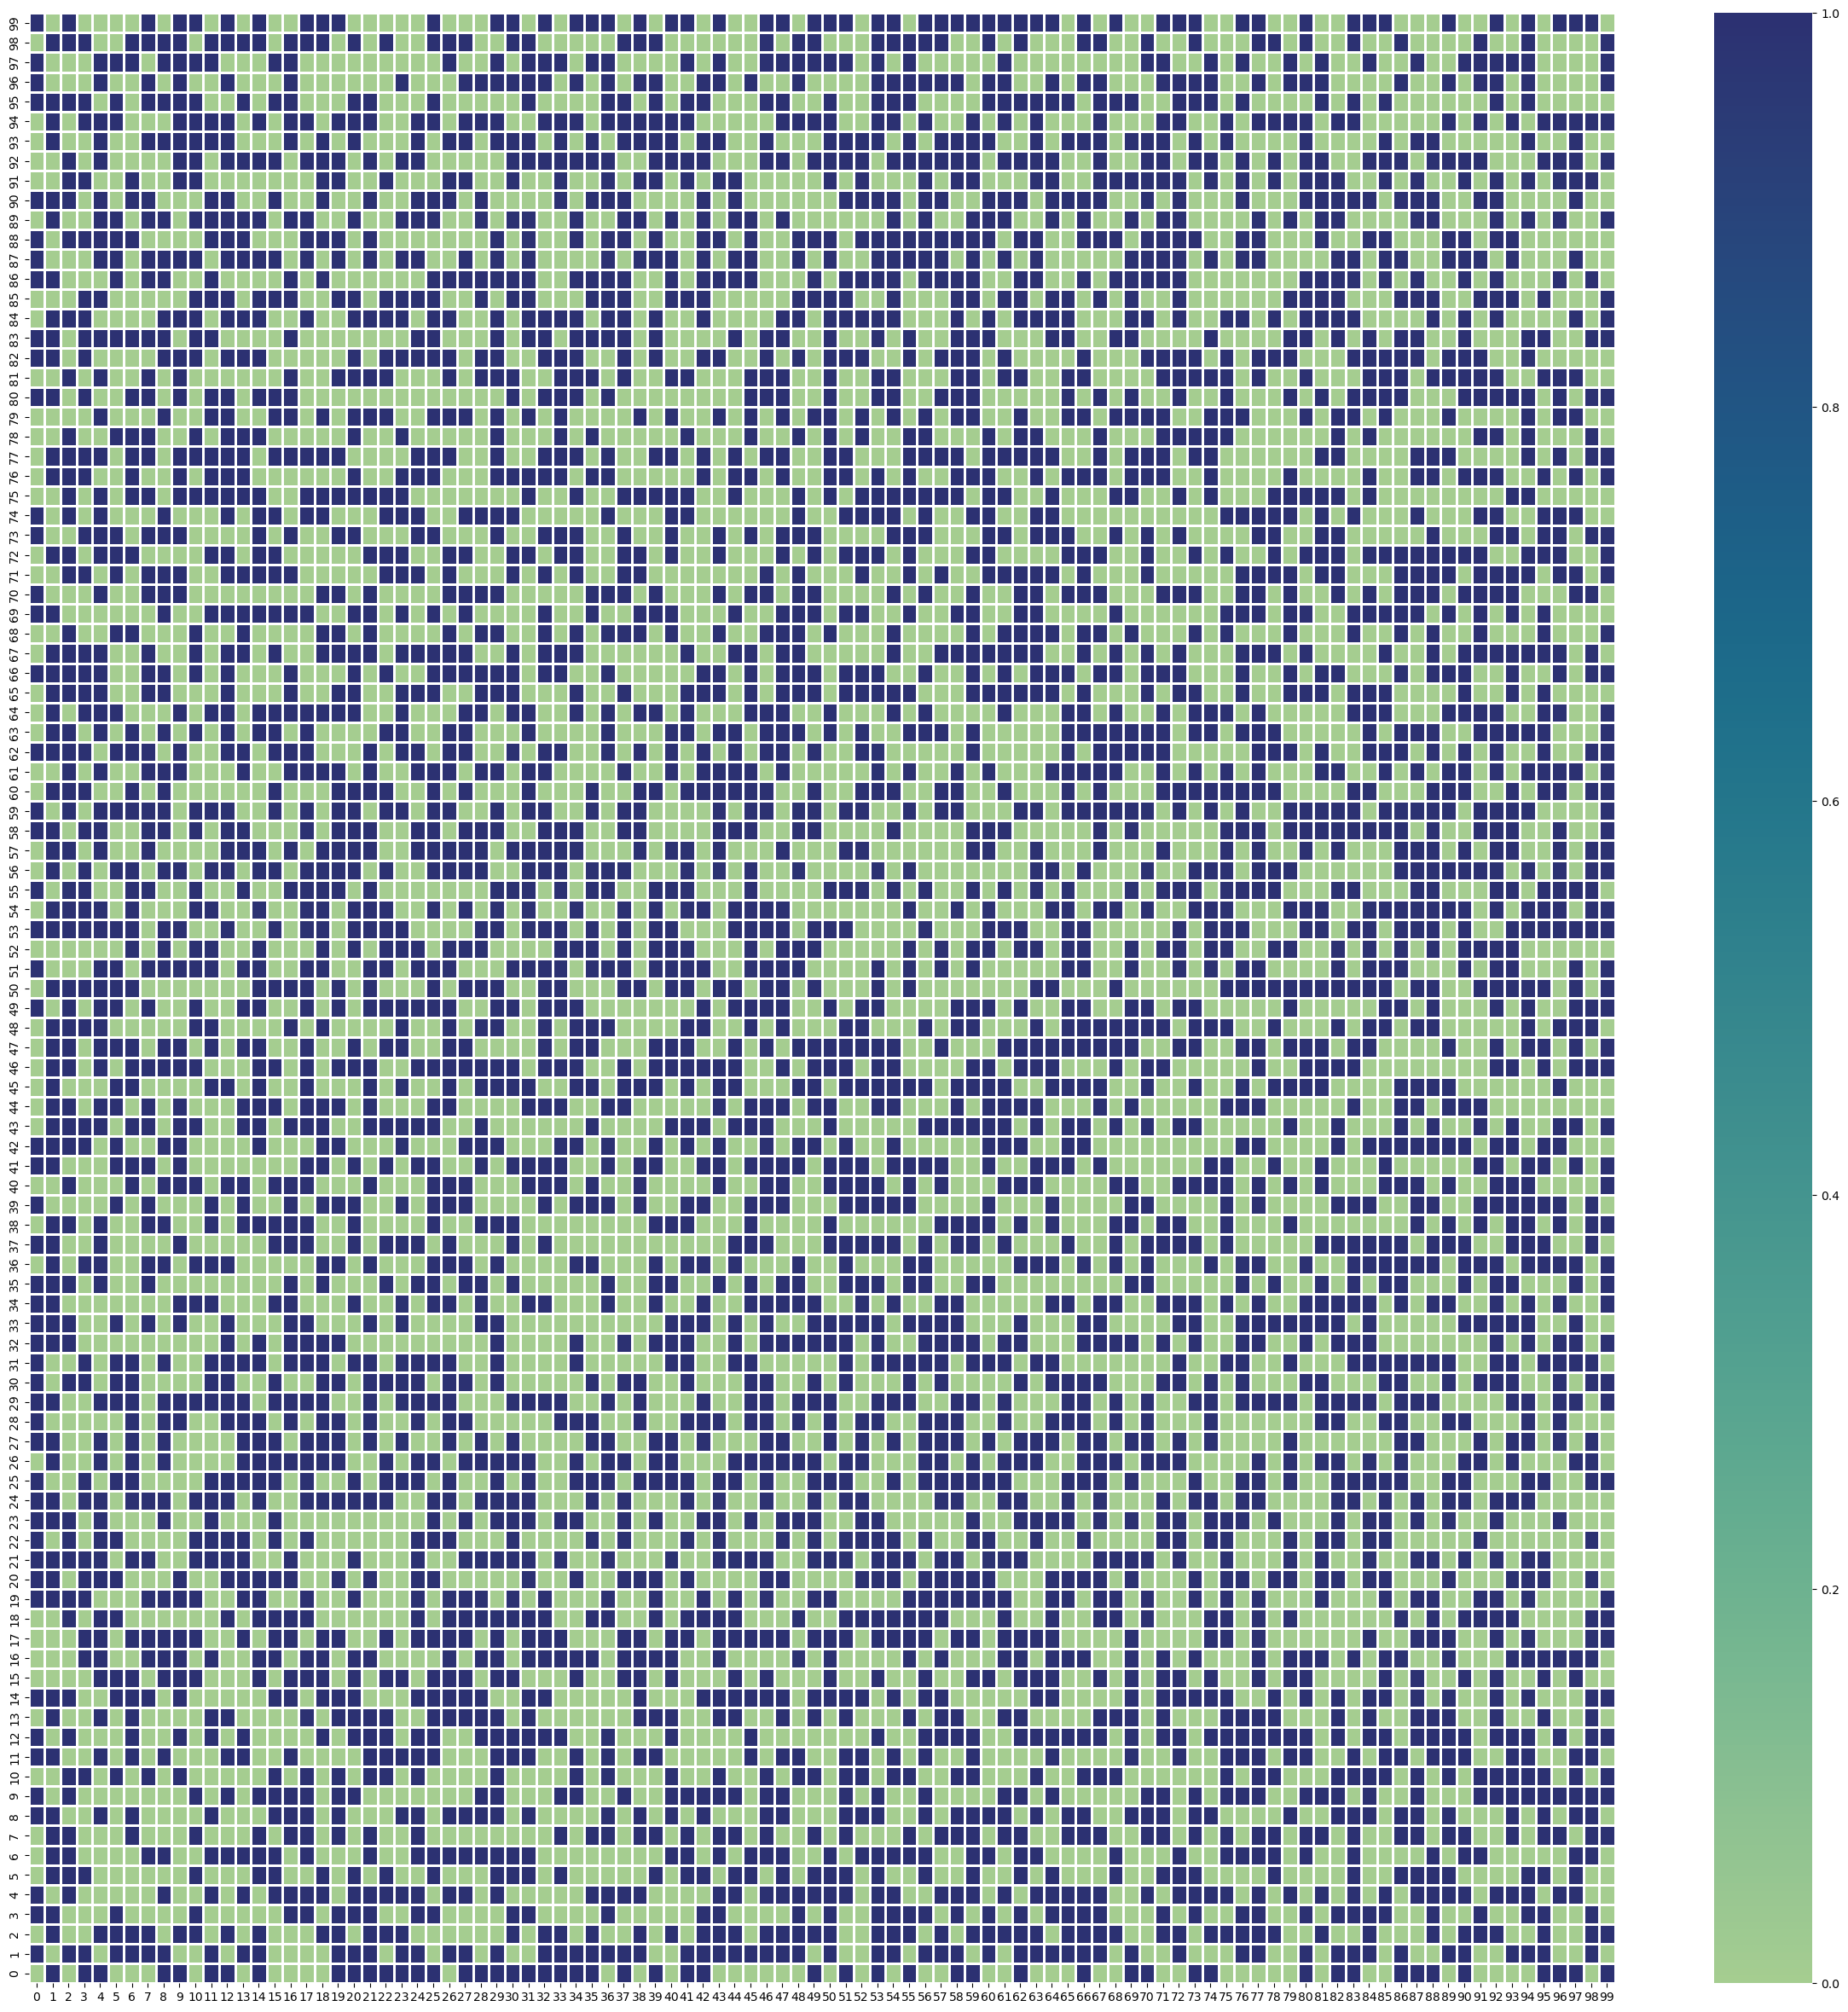

In [29]:
adj_matrix = nx.adjacency_matrix(G).toarray()
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(adj_matrix, linewidths= 1, cmap = 'crest')
plt.gca().invert_yaxis()
plt.show()

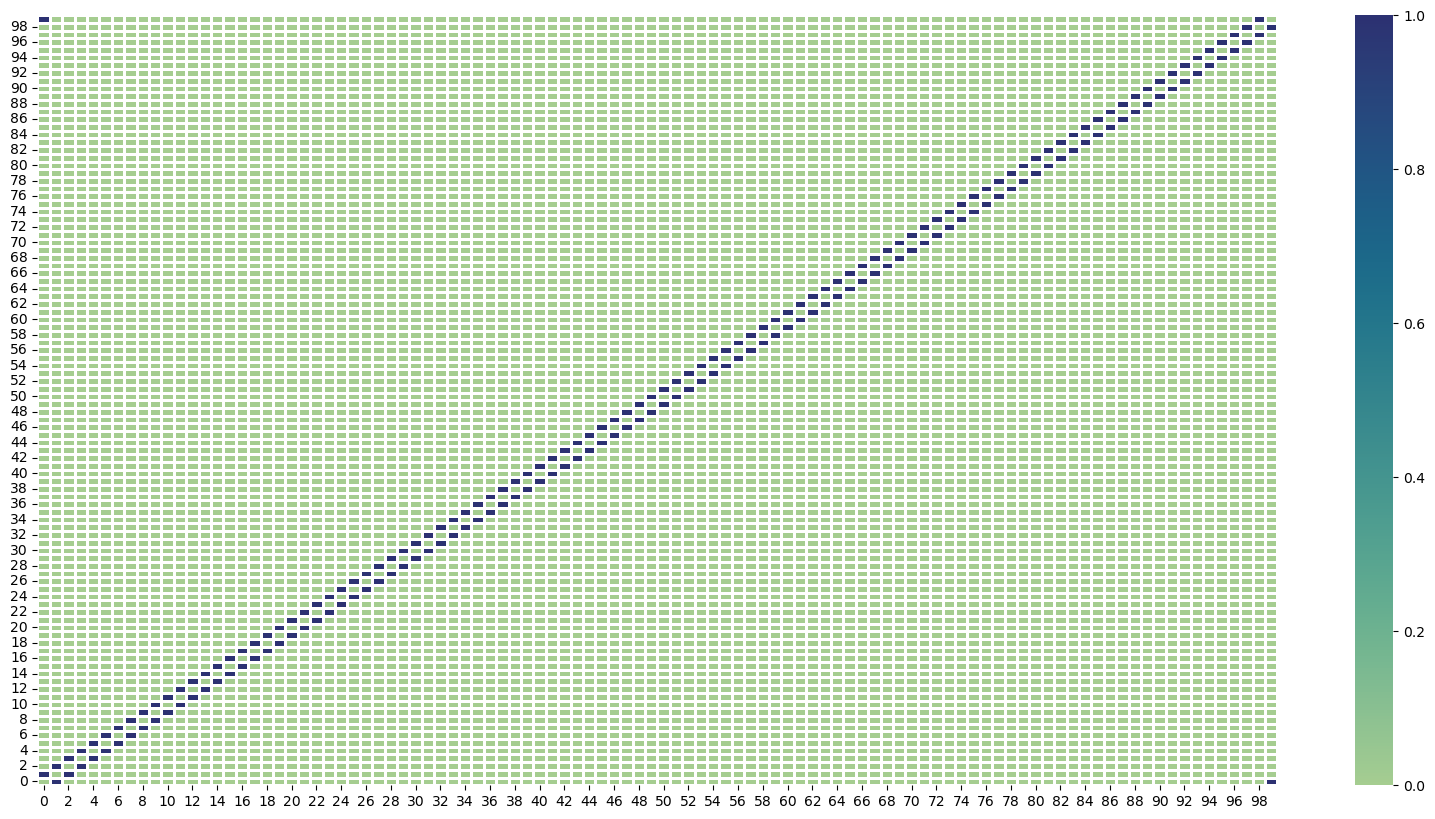

In [30]:
## With Cycle Graph
adj_matrix = nx.adjacency_matrix(vccG).toarray()
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(adj_matrix, linewidths= 1, cmap = 'crest')
plt.gca().invert_yaxis()
plt.show()

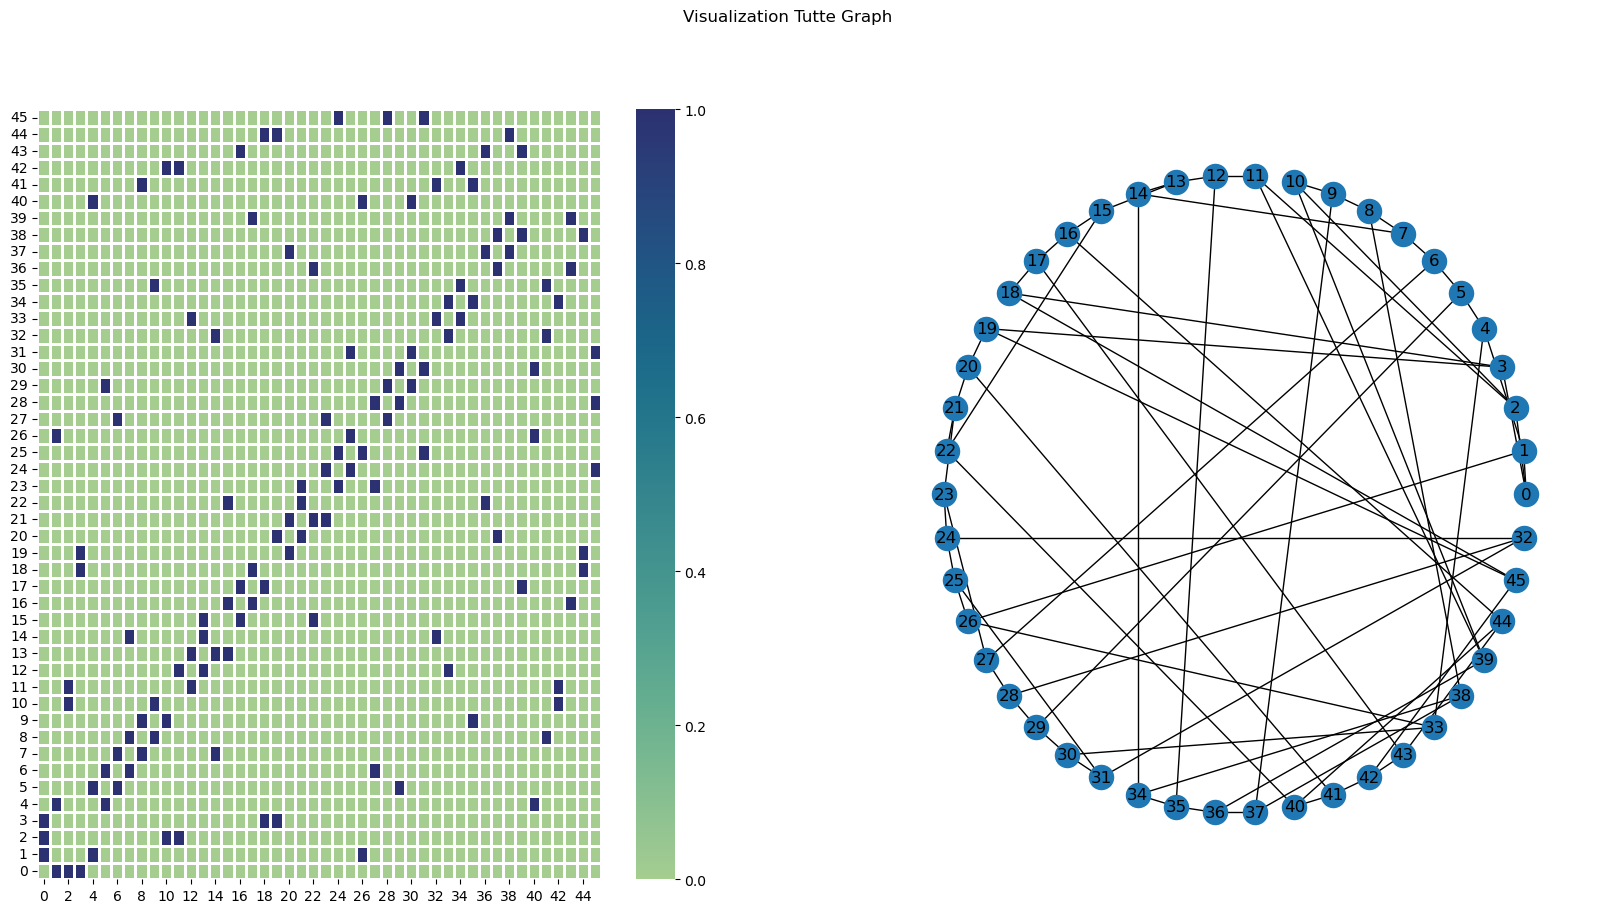

In [31]:
## With Tutte Graph
adj_matrix = nx.adjacency_matrix(nx.tutte_graph()).toarray()
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(adj_matrix, linewidths= 1, cmap = 'crest', ax = ax[0])
nx.draw_circular(nx.tutte_graph(), with_labels=True, ax = ax[1])
ax[0].invert_yaxis()
fig.suptitle('Visualization Tutte Graph')
plt.show()

__3.4. Force-Directed Layout__

Force-directed layouts are a type of node-link diagram, where the graph is visualized as nodes with links connecting them. (Like a paragraph 2)

### __4. Properties__

In [32]:
def graph_properties(G):
    # Nodes
    nodes = G.nodes()
    print(f"Nodes: {nodes}")
    
    # Degree
    degree = dict(G.degree())
    print(f"Degree: {degree}")
    
    # Degree distribution
    degree_distribution = dict(zip(range(len(degree)), nx.degree_histogram(G)))
    print(f"Degree distribution: {degree_distribution}")
    
    # Graph connectivity
    connectivity = nx.number_connected_components(G)
    print(f"Graph connectivity: {connectivity}")
    
    # Paths and distances
    shortest_path = dict(nx.all_pairs_shortest_path_length(G))
    print(f"Paths and distances: {shortest_path}")
    
    # Graph transitivity
    transitivity = nx.transitivity(G)
    print(f"Graph transitivity: {transitivity}")
    
    # Clustering coefficient
    clustering_coefficient = nx.clustering(G)
    print(f"Clustering coefficient: {clustering_coefficient}")


In [34]:
graph_properties(nx.cycle_graph(10))

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Degree: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}
Degree distribution: {0: 0, 1: 0, 2: 10}
Graph connectivity: 1
Paths and distances: {0: {0: 0, 1: 1, 9: 1, 2: 2, 8: 2, 3: 3, 7: 3, 4: 4, 6: 4, 5: 5}, 1: {1: 0, 0: 1, 2: 1, 9: 2, 3: 2, 8: 3, 4: 3, 7: 4, 5: 4, 6: 5}, 2: {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 9: 3, 5: 3, 8: 4, 6: 4, 7: 5}, 3: {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 0: 3, 6: 3, 9: 4, 7: 4, 8: 5}, 4: {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 1: 3, 7: 3, 0: 4, 8: 4, 9: 5}, 5: {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 2: 3, 8: 3, 1: 4, 9: 4, 0: 5}, 6: {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 2: 4, 0: 4, 1: 5}, 7: {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 0: 3, 3: 4, 1: 4, 2: 5}, 8: {8: 0, 7: 1, 9: 1, 6: 2, 0: 2, 5: 3, 1: 3, 4: 4, 2: 4, 3: 5}, 9: {9: 0, 8: 1, 0: 1, 7: 2, 1: 2, 6: 3, 2: 3, 5: 4, 3: 4, 4: 5}}
Graph transitivity: 0
Clustering coefficient: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


### __3. References__ <a id = "section-3"></a>

https://networkx.org/documentation/latest/

https://networkx.org/documentation/stable/reference/generators.html

https://walkenho.github.io/graph-theory-and-networkX-part1/#:~:text=G%3Dnx.rea,.edges%28%29

https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

Mr Le Ngoc Thanh' slides

__Visualization__

&emsp; https://nxviz.readthedocs.io/en/latest/usage.html#plots (nxviz)

&emsp; https://twosixtech.com/blog/6-ways-visualize-graphs/#:~:text=6%20Ways%20to%20Visualize%20Graphs%201%20Force-Directed%20Layout,book%20they%20first%20appear%20in.%20...%20More%20items